In [1]:
%run '../definitions.ipynb'
%run '../treemakers.ipynb'
%run '../Analysis_class.ipynb'

/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [94]:
local_data = False

if local_data:
    raise NotImplementedError('Download data first, you git!')
else:
    processed_data_path = '/data/xenon/xams/run8/processed/data/'
    minitree_path = '/data/xenon/xams/run8/minitrees/'
    # First run (1h) with super low PMT voltage: 575 / 725
    # 2 kV cathode?
    # run_names = get_run_list(processed_data_path, '170405_144005', '170405_152535')
    
    # Overnight BG before radon opening No 3
    # 675, 725 V
    run_names = get_run_list(processed_data_path, '170329_154317', '170330_074837')

Run list contains 33 files


In [95]:
run_names=  run_names[:4]

In [96]:
x = XAMSAnalysis(run_names, processed_data_path, minitree_path)

In [97]:
x.load()

Run 170329_154317: Making ExtraS1S2Properties minitree:   0%|          | 0/44356 [00:00<?, ?it/s]

Could not find run number for 170329_154317, got exception <class 'AttributeError'>: 'NoneType' object has no attribute 'query'. Setting run number to 0.
Don't know a run named 170329_154317, trying to find it anyway...


Don't know a run named 170329_154317, trying to find it anyway...
Could not find run number for 170329_161327, got exception <class 'AttributeError'>: 'NoneType' object has no attribute 'query'. Setting run number to 0.
Don't know a run named 170329_161327, trying to find it anyway...


Don't know a run named 170329_161327, trying to find it anyway...
Could not find run number for 170329_164337, got exception <class 'AttributeError'>: 'NoneType' object has no attribute 'query'. Setting run number to 0.
Don't know a run named 170329_164337, trying to find it anyway...


Don't know a run named 170329_164337, trying to find it anyway...
Could not find run number for 170329_171347, got exception <class 'AttributeError'>: 'NoneType' object has no attribute 'query'. Setting run number to 0.
Don't know a run named 170329_171347, trying to find it anyway...


Don't know a run named 170329_171347, trying to find it anyway...


In [11]:
x.corr_pmtgains([2.36e6, 0, 0, 2.28e6, 1e6, 0, 0, 0], [575, 725], verbose=True)

Using gains 65702.987303 and 183341.309940, factors 34.701619 and 12.872167, PMT1 and 2 respectively.


In [12]:
x.cut_interaction_exists()

Finite s1 selection: 13509 rows removed (80.94% passed)


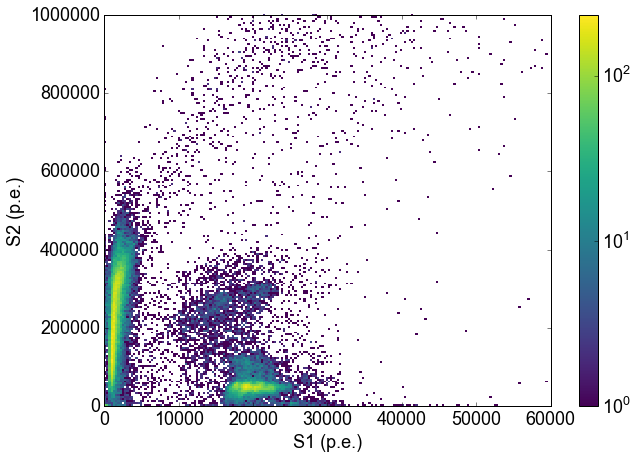

In [31]:
x.plot_s1s2(bins=200, norm=LogNorm(), range=((0, 60e3), (0, 1e6)))
plt.colorbar()
plt.show()

largest_other_s2 below 1000.0 selection: 14794 rows removed (74.20% passed)


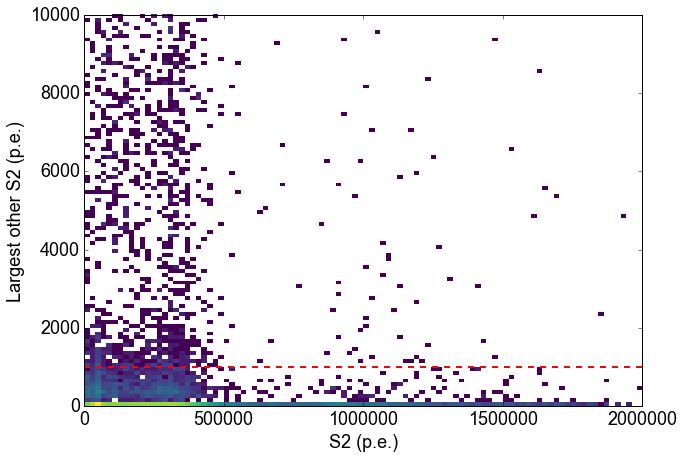

In [57]:
x.cut_largest_other_s2(largest_other_s2_max=1e3, apply=True, plot=True, 
                       bins=100, norm=LogNorm(), range=((0, 2e6), (0, 1e4)))

largest_other_s1 below 100 selection: 14389 rows removed (66.19% passed)


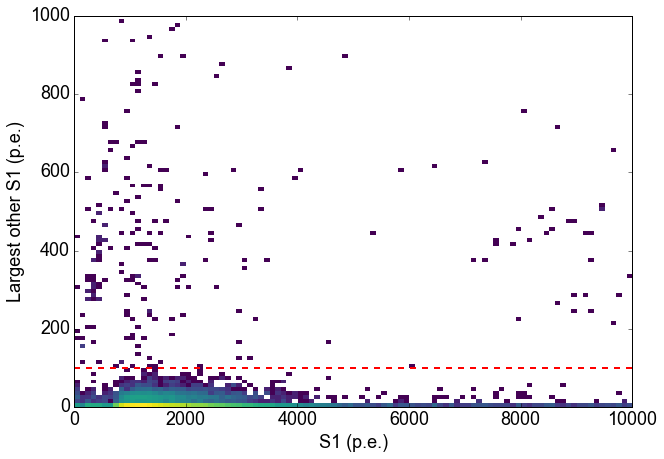

In [61]:
x.cut_largest_other_s1(largest_other_s1_max=100, apply=True, plot=True, 
                       bins=100, norm=LogNorm(), range=((0, 1e4), (0, 1e3)))

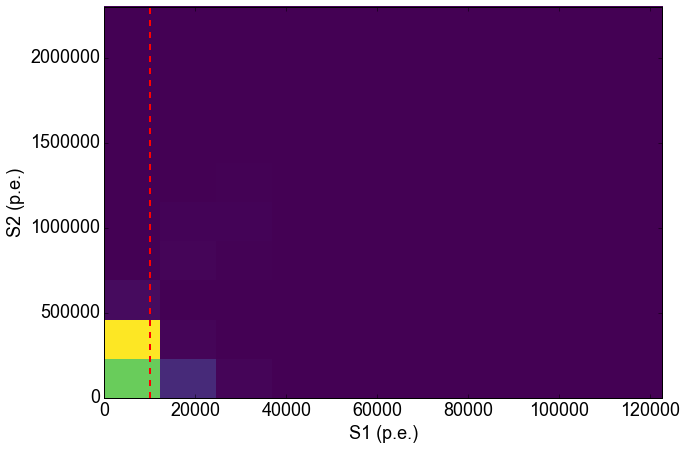

s1 below 10000.0 selection: 3320 rows removed (88.21% passed)
s2 below inf selection: 0 rows removed (100.00% passed)


In [65]:
x.cut_low_energy(s1_max=  10e3,s2_max=np.inf, plot=True)

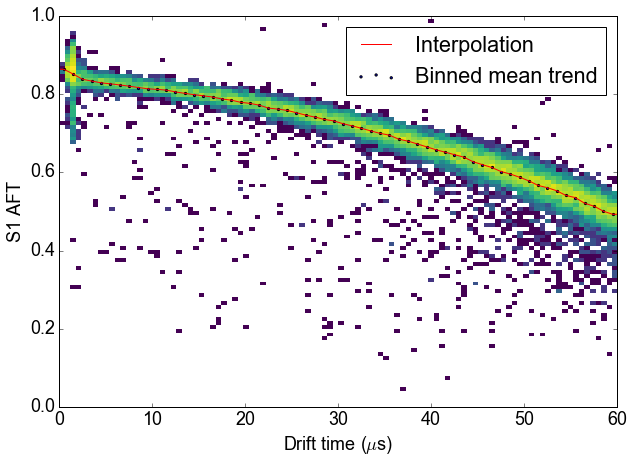

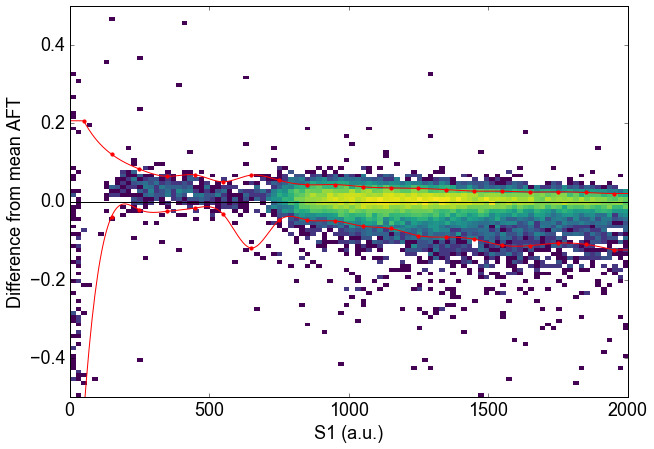

In [66]:
x.cut_s1_aft(apply=False, plot=True)

drift_time in [5, 67) selection: 1838 rows removed (92.60% passed)


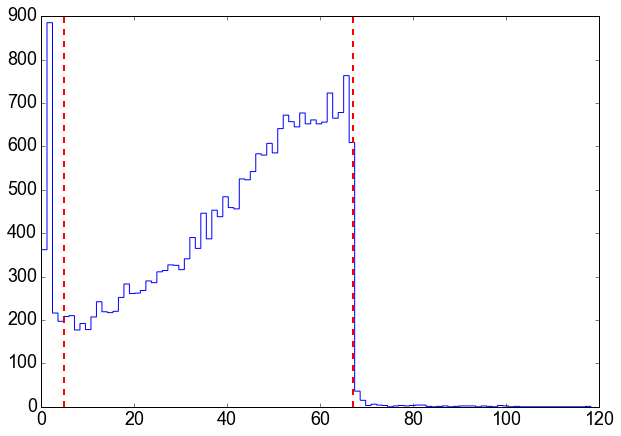

In [72]:
x.cut_drift_time(drift_time_bounds=(5, 67), apply=True, plot=True, bins=100, histtype='step')
plt.show()

In [73]:
x.d['z']  = -10 * x.d['drift_time'] / 67

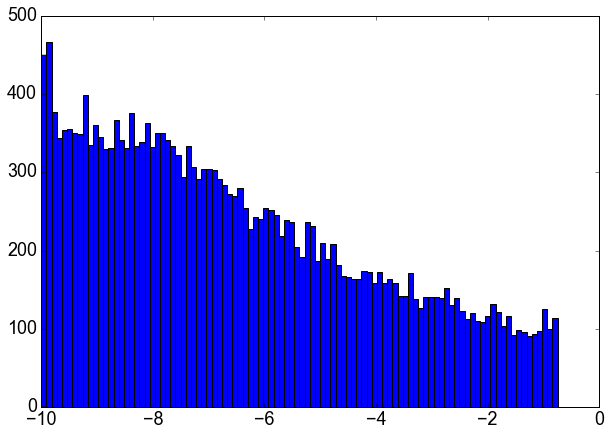

In [74]:
plt.hist(x.d['z'], bins=100)
plt.show()

In [76]:
def p2(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2
x.corr_s1_ly_poly()

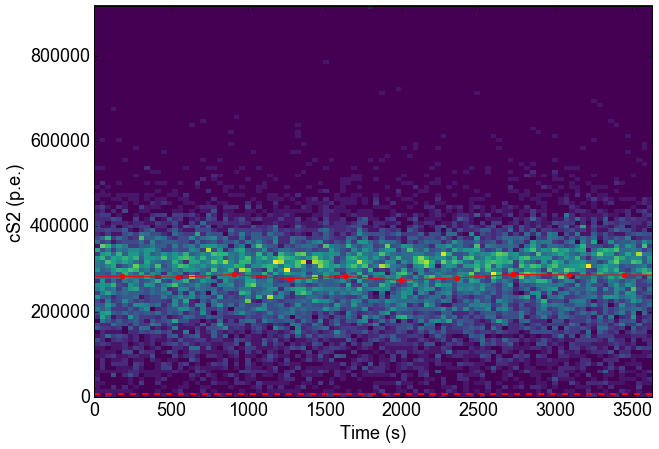

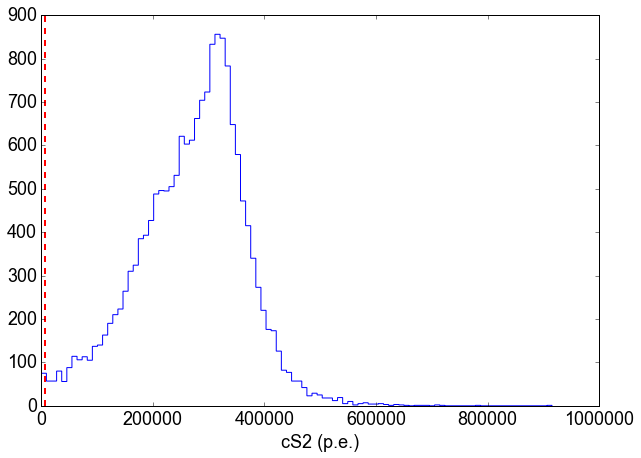

In [79]:
x.corr_s2_sag(apply=False, plot=True, cs1_range=(1000, 12000), bins=100)

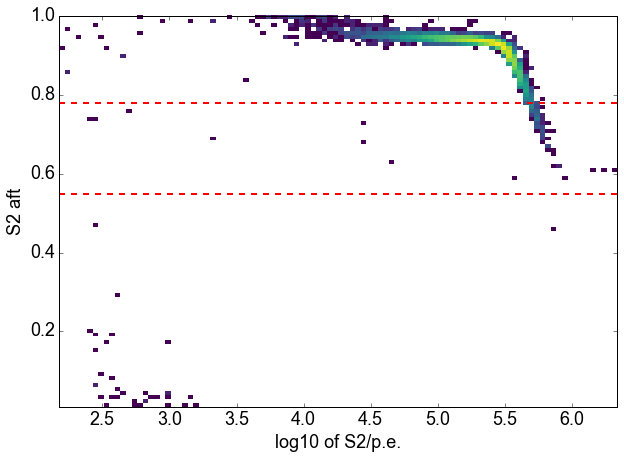

In [80]:
x.cut_s2_aft(plot=True, apply=False)

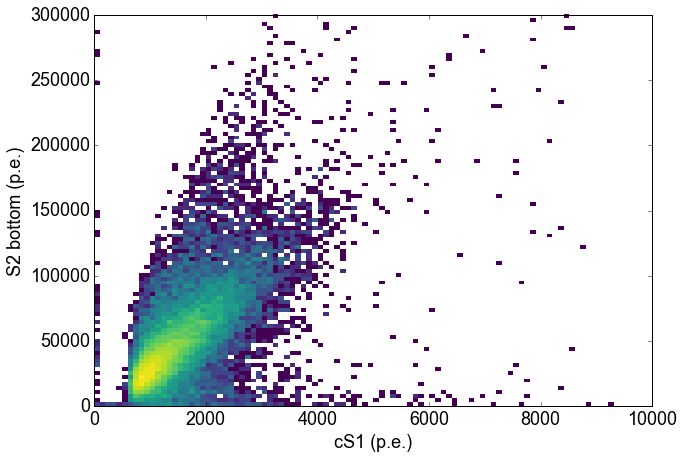

In [93]:
x.plot_cs1bs2(bins=100, norm=LogNorm(), range=((0, 10e3), (0, 3e5)))
x.plot_e_line(3.5e3)

In [85]:
x.add_ces()

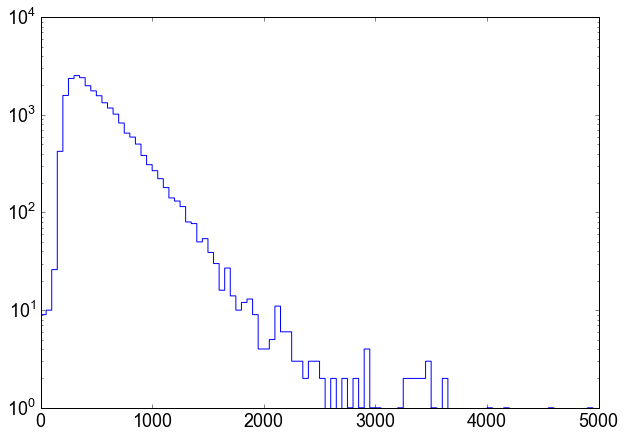

In [92]:
plt.hist(x.d['e_ces'], bins=100, range=(0, 5e3), histtype='step')
plt.yscale('log')
plt.show()